# Experimentation in the Polish Corpus

The objective of this notebook is to analyze the Polish Corpus and to examine the results obtained by applying the Part of Speech HMM tagger that we have developed.

## What is Part-of-Speech
The aim of Part-of-Speech is to refer to the syntactic role of each word in a sentence. Universal Dependencies (UD) includes a total of 17 tags where we can find:

*   **Adjectives (ADJ)**: Noun modifiers describing properties.
*   **Adverb (ADV)**: Verb modifiers of time, place, manner.
*   **Noun (NOUN)**: words for persons, places, things, etc.
*   **Proper noun (PROPN)**: name of person, organization, place, etc.
*   **Interjection (INTJ)**: exclamation, greeting, yes/no response, etc.
*   **Adposition (ADP)**: marks a noun's spacial, temporal or other relation.
*   **Auxiliary (AUX)**: helping verb marking tense, aspect, mood, etc.
*   **Coordinating Conjuction (CCONJ)**: joins teo phrases/clauses.
*   **Determiner (DET)**: marks noun phrase properties.
Numeral (NUM)
*   **Particle (PART)**: a preposition-like form used together with a verb.
*   **Pronoun (PRON)**: a shorthand for referring to an entity or event.
*   **Subordinating Conjunction (SCONJ)**: joins a main clause with subordinate clause.
*   **Verb (VERB)**: word that describes an action, occurrence, or state.
*   **Number (NUM)**:  words or symbols that represent numbers or quantities.
*   **Punctuation (PUNCT)**
*   **Symbols (SYM)**
*   **Other X**

## The Corpus
UD_Polish-LFG is a fully revised treebank which consists of academic texts in the polish lenguague. The dataset is obtained from the official Universal Dependencies (UD) [site](https://universaldependencies.org/), where we can find more details about the origin of the data and the anotation of the Corpus.

The corpus consists of 3 CoNLL-U files (train, dev and test). As it is explained in the [official UD website](https://universaldependencies.org/format.html), the CoNLL-U files contain 3 types of lines: word lines, blank lines and sentece-level comments. Sentence are composed of one or more word lines, and word lines contain the following fields:
*   **ID**: Word index in the actual sentence.
*   **FORM**: Word form or punctuation symbol.
*   **LEMMA**: Lemma or stem of word form.
*   **UPOS**: Universal part-of-speech tag.
*   **XPOS**: Optional languager or treebank-specific PoS / morphological tag.
*   **FEATS**: Lits of morphological features.
*   **HEAD**: Head of the current word.
*   **DEPREL**: Universal dependency relation to the Head.
*   **DEPS**: Enhanced dependency graph.
*   **MISC**: Other anotations.

For the Part-of-Speech task the only necessary fields are the FORM and the UPOS. Let's see the structure and some real examples of the data:

In [94]:
# ONLY NECESARY WHEN WORKING WITH GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


The following libraries are necessary to perform the data analysis

In [95]:
import numpy as np
import matplotlib.pyplot as plt

First we must read the conllu files so we created the following method:

In [96]:
def conllu_preprocess(file):
    data_file = open(file, "r", encoding="utf-8")
    corpus = []
    sentence = []
    for line in data_file:
        line = line.split('\t')
        if len(line) > 2:
            if '-' not in line[0]:
                if int(line[0]) == 1:
                    if sentence != []:
                        corpus.append(sentence)
                    sentence = [(line[1].lower(), line[3])]
                else:
                    sentence.append((line[1].lower(), line[3]))
    corpus.append(sentence)
    return corpus

In [97]:
# CHANGE THE DIRECTORY TO YOUR OWN LOCATION OF FILES
fTrain = '/content/drive/My Drive/datasets_syntax/pl_lfg-ud-train.conllu'
fDev = '/content/drive/My Drive/datasets_syntax/pl_lfg-ud-dev.conllu'
fTest = '/content/drive/My Drive/datasets_syntax/pl_lfg-ud-test.conllu'

trainCorpus = conllu_preprocess(fTrain)
devCorpus = conllu_preprocess(fDev)
testCorpus = conllu_preprocess(fTest)

As we can see in the [official treebank hub page](https://universaldependencies.org/treebanks/pl_lfg/index.html), the corpus contains in total 17245 sentences and 130964 syntactic words:

In [98]:
print("Size of TOTAL Corpus: " + str(len(trainCorpus)+len(devCorpus)+len(testCorpus)))
print("Total number of Tokens in Corpus: " + str(np.sum(list(len(item) for item in trainCorpus))+np.sum(list(len(item) for item in devCorpus))+np.sum(list(len(item) for item in testCorpus))))

Size of TOTAL Corpus: 17245
Total number of Tokens in Corpus: 130964


We can also see these words and sentences distributed in each train, dev and test files:

In [99]:
print("Size of Train Corpus: " + str(len(trainCorpus)))
print("Example of Sentence in Train Corpus: " + str(' '.join(item[0] for item in trainCorpus[2])))
print("Example of Tagged Sentence in Train Corpus: " + str(trainCorpus[2]))
print("Mean of number of Tokens in a Sentence in Train Corpus: " + str(np.mean(list(len(item) for item in trainCorpus))) +'\n')

print("Size of Dev Corpus: " + str(len(devCorpus)))
print("Example of Sentence in Dev Corpus: " + str(' '.join(item[0] for item in devCorpus[2])))
print("Example of Tagged Sentence in Dev Corpus: " + str(devCorpus[2]))
print("Mean of number of Tokens in a Sentence in Dev Corpus: " + str(np.mean(list(len(item) for item in devCorpus))) +'\n')

print("Size of Test Corpus: " + str(len(testCorpus)))
print("Example of Sentence in Test Corpus: " + str(' '.join(item[0] for item in testCorpus[2])))
print("Example of Tagged Sentence in Test Corpus: " + str(testCorpus[2]))
print("Mean of number of Tokens in a Sentence in Test Corpus: " + str(np.mean(list(len(item) for item in testCorpus)))+'\n')

Size of Train Corpus: 13774
Example of Sentence in Train Corpus: 11-latek przyniósł do szkoły w studziankach granat .
Example of Tagged Sentence in Train Corpus: [('11-latek', 'NOUN'), ('przyniósł', 'VERB'), ('do', 'ADP'), ('szkoły', 'NOUN'), ('w', 'ADP'), ('studziankach', 'PROPN'), ('granat', 'NOUN'), ('.', 'PUNCT')]
Mean of number of Tokens in a Sentence in Train Corpus: 7.604907797299259

Size of Dev Corpus: 1745
Example of Sentence in Dev Corpus: - a czemu miał pójść ?
Example of Tagged Sentence in Dev Corpus: [('-', 'PUNCT'), ('a', 'CCONJ'), ('czemu', 'ADV'), ('miał', 'VERB'), ('pójść', 'VERB'), ('?', 'PUNCT')]
Mean of number of Tokens in a Sentence in Dev Corpus: 7.510028653295129

Size of Test Corpus: 1726
Example of Sentence in Test Corpus: a co by było , gdyby były dwa albo trzy ?
Example of Tagged Sentence in Test Corpus: [('a', 'CCONJ'), ('co', 'PRON'), ('by', 'AUX'), ('było', 'VERB'), (',', 'PUNCT'), ('gdyby', 'SCONJ'), ('były', 'VERB'), ('dwa', 'NUM'), ('albo', 'CCONJ'), (

Taking a closer look, we can see how many different tags and words exist in each of these data splits. As it is mentioned in the official documentation, out of the 17 tags mentioned at the beggining, only 15 appear in the Corpus:

In [100]:
def analyze_tags(corpus):
  words = set()
  tags = set()
  tag_words = {}
  count_words_tag = {}
  for sentence in corpus:
    for pair in sentence:
      words.add(pair[0])
      tags.add(pair[1])
      if pair[1] in tag_words:
        tag_words[pair[1]].append(pair[0])
        count_words_tag[pair[1]] += 1
      else:
        tag_words[pair[1]] = [pair[0]]
        count_words_tag[pair[1]] = 1

  return words, tags, tag_words, count_words_tag

words_train, tags_train, tag_words_train, count_words_tag_train = analyze_tags(trainCorpus)
words_dev, tags_dev, tag_words_dev, count_words_tag_dev = analyze_tags(devCorpus)
words_test, tags_test, tag_words_test, count_words_tag_test = analyze_tags(testCorpus)

print("NUMBER OF DIFFERENT WORDS IN TRAIN:", len(words_train))
print("NUMBER OF DIFFERENT TAGS IN TRAIN:", len(tags_train))
print("POSSIBLE TAGS IN TRAIN: " + str(list(tags_train)))
print("WORDS FOR EACH TAG IN TRAIN: " + str(tag_words_train))
print("DISTRIBUTION OF TAGS: " + str(count_words_tag_train))
print("\n")

print("NUMBER OF DIFFERENT WORDS IN DEV:", len(words_dev))
print("NUMBER OF DIFFERENT TAGS IN DEV:", len(tags_dev))
print("POSSIBLE TAGS IN DEV: " + str(list(tags_dev)))
print("WORDS FOR EACH TAG IN DEV: " + str(tag_words_dev))
print("DISTRIBUTION OF TAGS: " + str(count_words_tag_dev))
print("\n")

print("NUMBER OF DIFFERENT WORDS IN TEST:", len(words_test))
print("NUMBER OF DIFFERENT TAGS IN TEST:", len(tags_test))
print("POSSIBLE TAGS IN TEST: " + str(list(tags_test)))
print("WORDS FOR EACH TAG IN TEST: " + str(tag_words_test))
print("DISTRIBUTION OF TAGS: " + str(count_words_tag_test))

NUMBER OF DIFFERENT WORDS IN TRAIN: 25558
NUMBER OF DIFFERENT TAGS IN TRAIN: 15
POSSIBLE TAGS IN TRAIN: ['NOUN', 'CCONJ', 'PROPN', 'AUX', 'ADV', 'DET', 'NUM', 'PUNCT', 'PART', 'VERB', 'SCONJ', 'PRON', 'ADP', 'INTJ', 'ADJ']
WORDS FOR EACH TAG IN TRAIN: {'ADJ': ['100-tysięcznym', 'rodowita', '19-letnia', '20-letni', 'jednej', 'kołobrzeskich', 'wojskowych', 'chronionych', 'ogrodniczej', 'ostrej', '23--letni', 'tajemniczych', '3-letnia', '3', 'dudniących', 'hałaśliwych', '31-letnia', 'ubiegłym', '43-letni', 'młodszy', 'mięsnych', 'całego', 'międzynarodowego', 'prawdomówny', 'niebagatelne', 'ostatni', 'mniejsze', 'iv', 'napędową', 'możny', 'ważne', 'rzadsze', 'cenniejsze', 'odrobiony', 'sportowego', 'osiągalna', 'rosyjsku', 'inni', 'sarajewscy', 'stalowej', 'jeden', 'odpowiednich', 'pokrzywdzony', 'parlamentarno', 'gabinetowy', 'innego', 'zupełnem', 'pierwszej', 'cenny', 'gospodarcza', 'nerwowe', 'dobre', 'starej', 'zapłacony', 'dwudziestego', 'zakonserwowanym', 'najstarszy', 'kolejne', 'sł


All splits contain the same tags. In all cases:

* The *X* tag is missing. According to [universal dependencies website](https://universaldependencies.org/u/pos/X.html) this tag is used for words that for some reason cannot be assigned a real part-of-speech category. This means that all words are classified into real POS category.
* The *SYM* tag is missing. According to [universal dependencies website](https://universaldependencies.org/u/pos/SYM.html) word-like entity that differs from ordinary words by form, function, or both. This means that there arent't any symbols that have an interpretation like, for example, *:)* or *km*.





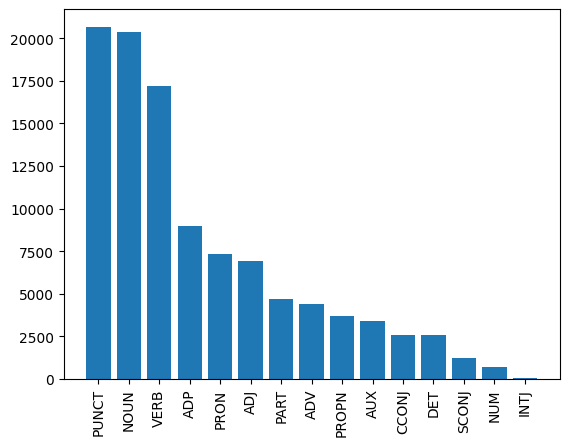

In [101]:
count_words_tag_train = {k: v for k, v in sorted(count_words_tag_train.items(), key=lambda item: item[1], reverse=True)}
plt.bar(count_words_tag_train.keys(), count_words_tag_train.values())
plt.xticks(rotation='vertical')
plt.show()

As it can be seen in the graphic, the most common tags are PUNCT, NOUN, and VERB meanwhile SCONJ, NUM and INTJ are the rarest one. This means that the dataset is not ballanced.

## Hidden Markov Model(HMM)
In the HMM models we need the following elements:
*   A set of N states (tags): Q = q1, q2, ..., qN
*   A sequence of T observations (words): O = o1, o2,...,oT
*   A transition probability matrix: A = a11,..., aNN
*   A sequence of observation likelihoods: B = bi(ot)
*   An initial probability distribution over states: π = π1, ..., πN

We also need to make the following two simplifying assumptions:
*   Markov assumption: the probability of a particular state only depends on the previous state.
> $$P(q_i | q_1,..., q_{i-1}) = P(q_i|q_{i-1})$$

*   Output independence: the probability of an output observation depends only on the current state.
> $$P(o_1|q_1,...,q_T,o_1,...,o_T) = P(o_i|q_i)$$

To assign a tag to a new sentence we use the Viterbi algorithm. Instead of enumerating all posisible tag sequences, Viterbi makes use of the Markov assumption in the HMM to make the calculations faster:
> $$
argmax_{y \in Y} = \prod_{i=1}^{n+1} p(y_i | y_{i-1}) \prod_{i=1}^{n} p(x_i | y_{i})
$$

If we have very long sentences multiplying probabilities will produce very small numbers which may end up with 0 probabilities because of underflow. In our tagger we use log probabilities to avoid this problem.

> $$
argmax_{y \in Y} = \sum_{i=1}^{n+1} log p(y_i | y_{i-1}) \sum_{i=1}^{n} log p(x_i | y_{i})
$$

HMM model is a generative model so to calculate the probabilities we do the same as with language models:
> $$q(y_i | y_{i-1}) = \frac{count(y_{i-1}, y_i)}{count(y_{i-1})}$$

A problem that we might encounter during the evaluation process is to find a word that we haven't seen in training. A possible solution for this is to replace all infrequent words with a single UNK token. To determine which tokens are treated as UNK tokens, we require to set a threshold of number of apparitions of said token in the corpus. There is no clear ruling as to which is the optimal value for this threshold.

Another approximation we developed is the use of suffixes instead of words for the emission matrix. This approach is based on the idea that words with the same syntactic role may share the suffix due to morphological rules. For example: 'informacja', 'edukacja', 'akcja', and 'reakcja' all of them are nouns and share the suffix '-cja'.

The class created for the Hidden Markov Model is the following:


In [102]:
import pickle
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from collections import Counter
from tabulate import tabulate


class HMM_PoS_Tagger:
    def __init__(self):
        ud_pos_tags = ["Start", "ADJ", "ADP", "ADV", "AUX", "CCONJ", "DET", "INTJ", "NOUN", "NUM", "PART", "PRON",
                       "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X"]
        ud_prev_tags = ["ADJ", "ADP", "ADV", "AUX", "CCONJ", "DET", "INTJ", "NOUN", "NUM", "PART", "PRON", "PROPN",
                        "PUNCT", "SCONJ", "SYM", "VERB", "X", "Stop"]
        # Initialization of every transition log-probability to negative infinity
        # 'Start' tag only present as a previous tag, 'Stop' as a final tag
        self.trans_prob = {tag: {subtag: 0.0001 for subtag in ud_prev_tags} for tag in ud_pos_tags}
        self.emis_prob = {}
        self.suffix_prob = {}
        self.multi_word_tokens = {}

    def setMultiTokensDict(self, multi_word_tokens):
        self.multi_word_tokens = multi_word_tokens

    def infrequent_words_to_unk(self, trainCorpus, unk_value):
        words_count = {}

        # we calculate the distribution for each word
        for sentence in trainCorpus:
            for pair in sentence:
                if pair[0] in words_count:
                    words_count[pair[0]] += 1
                else:
                    words_count[pair[0]] = 1

        # we replace all infrequent words with a single 'UNK' token
        new_trainCorpus = []
        for sentence in trainCorpus:
            new_sentence = []
            for pair in sentence:
                if words_count[pair[0]] < unk_value:
                    new_sentence.append(('UNK', pair[1]))
                else:
                    new_sentence.append(pair)
            new_trainCorpus.append(new_sentence)

        return new_trainCorpus

    def suffix_matrix(self, trainCorpus):
        for sentence in trainCorpus:
            for pair in sentence:
                if (len(pair[0]) > 4):
                    suffix = pair[0][len(pair[0]) - 4:]
                    tag = pair[1]

                    # Build the matrix by counting the number of appearances of each suffix and tag
                    # Suffix matrix
                    if suffix not in self.suffix_prob.keys():
                        self.suffix_prob[suffix] = {}
                        self.suffix_prob[suffix][tag] = 1
                    else:
                        if tag not in self.suffix_prob[suffix].keys():
                            self.suffix_prob[suffix][tag] = 1
                        else:
                            self.suffix_prob[suffix][tag] += 1

        # Change from the count to the log probability of apparitions
        # Suffix matrix
        for suf in self.suffix_prob.keys():
            total_apariciones = sum(self.suffix_prob[suf].values())
            for tag in self.suffix_prob[suf].keys():
                conteo_tag = self.suffix_prob[suf][tag]
                self.suffix_prob[suf][tag] = np.log(conteo_tag / total_apariciones)

    def train(self, trainCorpus, suffix=False, unk_value=3):
        print("Training...")

        # Data is a list of lists (sentences) of tuples word-tag
        if suffix:
            self.suffix_matrix(trainCorpus)

        trainCorpus = self.infrequent_words_to_unk(trainCorpus, unk_value=unk_value)

        for sentence in trainCorpus:

            prev_tag = "Start"  # Tag for calculating the initial probabilities
            for pair in sentence:
                word = pair[0]
                tag = pair[1]

                # Build the matrices by counting the number of appearances of each word and tag
                # Emission matrix
                if word not in self.emis_prob.keys():
                    self.emis_prob[word] = {}
                    self.emis_prob[word][tag] = 1
                else:
                    if tag not in self.emis_prob[word].keys():
                        self.emis_prob[word][tag] = 1
                    else:
                        self.emis_prob[word][tag] += 1

                # Transition matrix, check if cell value is negative infinity first
                self.trans_prob[prev_tag][tag] += 1
                prev_tag = tag

            # Add the probability of the tag being terminal to the transition matrix
            self.trans_prob[prev_tag]["Stop"] += 1

        # Change from the count to the log probability of apparitions
        # Emission matrix
        for word in self.emis_prob.keys():
            total_apariciones = sum(self.emis_prob[word].values())
            for tag in self.emis_prob[word].keys():
                conteo_tag = self.emis_prob[word][tag]
                self.emis_prob[word][tag] = np.log(conteo_tag / total_apariciones)

        # Transition matrix
        for prev_tag in self.trans_prob.keys():
            total_apariciones = sum(self.trans_prob[prev_tag].values())
            for tag in self.trans_prob[prev_tag].keys():
                conteo_tag = self.trans_prob[prev_tag][tag]
                self.trans_prob[prev_tag][tag] = np.log(conteo_tag / total_apariciones)

        # There are combinations of word-tag that might not appear in the training corpus
        # To deal with those cases, we must check if the entry exists in the matrices and if not, assign a
        # negative infinite log-probability

    def eval(self, testCorpus):
        # First, obtain the gold metrics to compare the predictions
        gold_tags = []
        test_sentences = []

        for sent in testCorpus:
            words = []
            for pair in sent:
                gold_tags.append(pair[1])
                words.append(pair[0])
            test_sentences.append(" ".join(words))

        # Sentences are in a list of lists
        # Gold tags are just a list

        # Then, we obtain de predictions of the model using the predict() method
        predictions = []
        for sentence in test_sentences:
            best_path = self.predict(sentence)
            # The predict method returns a list of tuples word-tag, we just need the tags
            predictions.extend([tag for word, tag in best_path])

        return gold_tags, predictions

    def top10worstPredictions(self, testCorpus):

        i = 0
        countsErrors = []
        countSErrorsUnit = []

        gold_tags, predictions = self.eval(testCorpus)

        for sent in testCorpus:
            countErrors = 0
            errors = []
            countSErrorsUnit.append(sent)
            for pair in sent:
                if pair[1] != predictions[i]:
                    errors.append((pair[0], predictions[i]))
                    countErrors += 1
                i += 1
            countSErrorsUnit.append(errors)
            countSErrorsUnit.append(countErrors / len(sent))
            countsErrors.append(countSErrorsUnit)
            countSErrorsUnit = []

        top10positions = [index for index, _ in sorted(enumerate(countsErrors), key=lambda x: x[1][2], reverse=True)[:10]]
        top10sentences = [countsErrors[pos] for pos in top10positions]

        tableCounts = tabulate(top10sentences, ["Real sentence and tags", "Incorrect tags", "Error rate"], tablefmt="grid")
        print(tableCounts)

    def evaluate(self, testCorpus):
        print("Evaluating...\n")

        gold_tags, predictions = self.eval(testCorpus)

        gold_counts = Counter(gold_tags)
        predictions_counts = Counter(predictions)
        tags = set(gold_tags).union(set(predictions))

        countsTable = []

        for tag in tags:
            gold_counts_tag = gold_counts.get(tag, 0)
            predictions_counts_tag = predictions_counts.get(tag, 0)
            diff = gold_counts_tag - predictions_counts_tag
            if diff < 0:
                diff = abs(diff)
            countsTable.append([tag, gold_counts_tag, predictions_counts_tag, diff])

        metricsResuts = [["Accuracy", str(self.accuracy(gold_tags, predictions))],
                         ["Precison", str(self.precision(gold_tags, predictions))],
                         ["Recall", str(self.recall(gold_tags, predictions))],
                         ["F1 Score", str(self.f1_score(gold_tags, predictions))]]
        tableCounts = tabulate(countsTable, ["Tag", "Gold counts", "Prediction counts", "Difference"], tablefmt="grid")
        tableMetrics = tabulate(metricsResuts, ["Metric", "Score"], tablefmt="grid")

        print("The results of the evaluations are:\n")
        print("Metrics:\n")
        print(tableMetrics)
        print("\nCounts' differences:\n")
        print(tableCounts + "\n")

        self.confusion_matrix(gold_tags, predictions)

    def evaluate_summary(self, testCorpus):
        # First, obtain the gold metrics to compare the predictions
        gold_tags, predictions = self.eval(testCorpus)

        metricsResults = [["Accuracy", str(self.accuracy(gold_tags, predictions))],
                          ["Precison", str(self.precision(gold_tags, predictions))],
                          ["Recall", str(self.recall(gold_tags, predictions))],
                          ["F1 Score", str(self.f1_score(gold_tags, predictions))]]
        tableMetrics = tabulate(metricsResults, ["Metric", "Score"], tablefmt="grid")

        print("Metrics:\n")
        print(tableMetrics)

    def evaluate_per_tag(self, testCorpus):
        # First, obtain the gold metrics to compare the predictions
        gold_tags, predictions = self.eval(testCorpus)

        print(classification_report(gold_tags, predictions, digits=4))

    def accuracy(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        score = len([1 for x, y in zip(gold_tags, predictions) if x == y])
        total = len(gold_tags)
        acc = accuracy_score(gold_tags, predictions)

        print("SCORE:", score, "/", total)
        return acc

    def precision(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        precision = precision_score(gold_tags, predictions, average="weighted", zero_division=1)

        return precision

    def recall(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        recall = recall_score(gold_tags, predictions, average="weighted")

        return recall

    def f1_score(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        fscore = f1_score(gold_tags, predictions, average="weighted")

        return fscore

    def confusion_matrix(self, gold_tags, predictions):
        # At this point, both gold and pred are lists of tags
        conf_matrix = confusion_matrix(gold_tags, predictions)

        display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                         display_labels=sorted(set(gold_tags).union(set(predictions))))
        fig, ax = plt.subplots()
        display.plot(ax=ax)
        ax.set_xticklabels(display.display_labels, rotation=-45)
        ax.set_title("Confusion matrix", loc="center")
        plt.show()

        return conf_matrix

    def predict(self, sentence):
        # The prediction of the Hidden Markov Models depend on two assumptions
        # 1.- Markov assumption: the probability of a particular state only depends on the previous state.
        # 2.- Output independence: the probability of an output observation depends only on the current state.
        start = True
        tags = self.trans_prob.keys()
        best_path = []
        for word in sentence.split(" "):
            probs_act = {}
            if start:
                start = False
                previousTag = "Start"
                bestPreviousProb = 0

            for tag in tags:
                if tag != "Start":
                    # EMISSION PROBABILITIES
                    if word in self.emis_prob.keys():
                        if tag in self.emis_prob[word].keys():
                            emission = self.emis_prob[word][tag]
                        else:
                            emission = float('-inf')
                    else:
                        if (self.suffix_prob != {} and len(word) > 4) and word[
                                                                          len(word) - 4:] in self.suffix_prob.keys() and tag in \
                                self.suffix_prob[word[len(word) - 4:]].keys():
                            emission = self.suffix_prob[word[len(word) - 4:]][tag]
                        else:
                            if tag in self.emis_prob['UNK'].keys():
                                emission = self.emis_prob['UNK'][tag]
                            else:
                                emission = float('-inf')

                    # TRANSITION PROBABILITIES
                    transition = self.trans_prob[previousTag][tag]
                    probs_act[tag] = bestPreviousProb + emission + transition

            bestPreviousProb = np.max(list(probs_act.values()))
            previousTag = list(probs_act.keys())[np.argmax(list(probs_act.values()))]
            best_path.append((word, previousTag))

        return best_path

    def probability(self, pair):
        print("Calculating probability...")

    def save_model(self, r):
        print("Saving model...")
        file = open(r, "wb")
        pickle.dump(self, file)
        file.close()

As seen above, the model counts with four parameters:
* **trans_prob:** the transition matrix, contains de log-probabilities of each tag being followed by every tag. In practice this parameter is a dictionary of dictionaries, which allows for the easy extraction of the log-probability of a two-tag sequence.
* **emis_prob:** the emission matrix, contains the log probabilities of each word being a tag. This parameter functions similarly as the transition matrix, as it is a dictionary of dictionaries.
* **suffix_prob:** in order to process UNK tokens more reliably, we implemented a function that predicts the tag of an UNK token based on its suffix. This matrix stores the log-probability of each suffix belonging to each tag.
* **multi_word_tokens:** while this parameter is present, it will not be used in this specific use case, as multi-word tokens are not present in the Polish language as they are in Portuguese.

Regarding the class methods, we based them on the ones present in the [HiddenMarkovModelTagger from NLTK](https://tedboy.github.io/nlps/generated/generated/nltk.tag.HiddenMarkovModelTagger.html).
* **train():** loops over the training corpus and registers the frequency of each tag-tag sequence and word-tag pair in the *transmission* and *emission* matrices. Then it converts the frequency counts into the log-probabilities.
* **infrequent_words_to_unk():** computes the number of appearances of each word in the train corpus. Then substitutes every word with a lower number of total appearances than a given a numeric threshold by the token '*UNK*'
* **setMultiTokensDict():** sets the value of the *multi_word_tokens* parameter to the one obtained during the preprocessing of the corpus. As mentioned before, this parameter will not have a use for the Polish corpus.
* **sufix_matrix():** loops over the train corpus to set the values of the *suffix_prob* parameter. Similarly to *train()*, first counts the frequencies of appearance and then computes the log-probabilites.
* **predict():** given an input sentence, outputs the most likely sequence of tags to match the tokens in it.
* **eval():** returns the array of true tags and predictions for a test corpus
* **evaluate():** it evaluates a previously trained model using the *eval()* method, and prints the obtained metrics, alongside a table with the true and predicted values for each tag.
* **evaluate_summary():** a simplified version of the previous method, used for more visual clarity when comparing the results obtained over multiple test when doing a hyperparameter sweep.
* **evaluate_per_tag():** throws the result of multiple metrics for each tag present in the test corpus.
* **top10worstPredictions():** prints a table showing the 10 sentences present in the test corpus the model performed the worst in, based on the percentage of correctly tagged tokens. It also shows the correct and incorrect tags, and the error rate.
* **accuracy()**, **precision()**, **recall()**, **f1_score()** and **confusion_matrix():** each computes one of the metrics used to evaluate the model. The confusion matrix plots the results in a more visual way.
* **probability():** given as tag-tag or a word-tag pair, returns their transmission or emission probability respectively. If the first element of the pair is a word not found in the emission matrix, it counts it as an *UNK* token.

Some of these functions are used by others, just like *infrequent_words_to_unk()* is called by *train()*.

## Experimentation
### First approach
The first step is to read and process the Corpus so we can use it for the experimentation.

In [103]:
def conllu_preprocess(file):

    trainCorpus = []
    sentence = []

    with open(file, 'r', encoding="utf-8") as data_file:
        lines = data_file.readlines()
        total_lines = len(lines)

        for i, line in enumerate(lines):
            if i < total_lines - 2:
                line = line.split('\t')
                if len(line) > 2:
                    if '-' not in line[0]:
                        if int(line[0]) == 1:
                            if sentence != []:
                                trainCorpus.append(sentence)
                            sentence = [(line[1].lower(), line[3])]
                        else:
                            sentence.append((line[1].lower(), line[3]))

    return trainCorpus

fTrain = '/content/drive/My Drive/datasets_syntax/pl_lfg-ud-train.conllu'
fDev = '/content/drive/My Drive/datasets_syntax/pl_lfg-ud-dev.conllu'
fTest = '/content/drive/My Drive/datasets_syntax/pl_lfg-ud-test.conllu'

trainCorpus = conllu_preprocess(fTrain)
devCorpus = conllu_preprocess(fDev)
testCorpus = conllu_preprocess(fTest)

Now that we have read the files we are going to create a new instance of the tagger and train it:

In [104]:
tagger = HMM_PoS_Tagger()

tagger.train(trainCorpus, unk_value=3)

Training...


By default, the value of the threshold for infrequent tokens is set to 3. Any token in the corpus that appears 3 times or less will be substituted by the special token 'UNK'. Also, the option for taking suffixes into account for unknown words is not activated. Let's evaluate this first version of the model with the *dev* dataset:

Evaluating...

SCORE: 10880 / 13100
The results of the evaluations are:

Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.830534 |
+----------+----------+
| Precison | 0.863418 |
+----------+----------+
| Recall   | 0.830534 |
+----------+----------+
| F1 Score | 0.818617 |
+----------+----------+

Counts' differences:

+-------+---------------+---------------------+--------------+
| Tag   |   Gold counts |   Prediction counts |   Difference |
+=======+===============+=====================+==============+
| AUX   |           430 |                 325 |          105 |
+-------+---------------+---------------------+--------------+
| ADJ   |           819 |                 205 |          614 |
+-------+---------------+---------------------+--------------+
| VERB  |          2204 |                3242 |         1038 |
+-------+---------------+---------------------+--------------+
| SCONJ |           150 |                 144 |            6 |


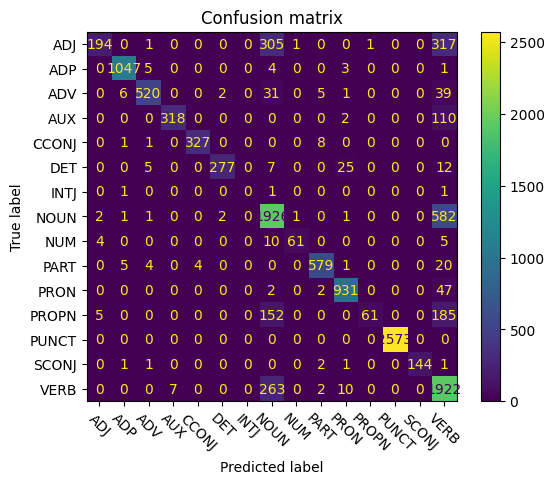

In [105]:
tagger.evaluate(devCorpus)

## Hyperparameter optimization

So far, we obtain an accuracy of 0.8305 and a F1-score of 0.8186. But, what would be the results of the model with different values for the 'UNK' tokens threshold? In order to test this, we implemented a method to help us make a hyperparameter sweep and quickly train and evaluate multiple models with different values. We did this for 3, 5, 10, 20 and 25 appearances as the threshold.

In [106]:
import warnings
warnings.filterwarnings('ignore')
def unk_sweep(trainCorpus, train_multi_tokens, test_Corpus, unk_array, suffix=False):

  for unk in unk_array:
    # Generate and train the model
    tagger = HMM_PoS_Tagger()
    tagger.train(trainCorpus, unk_value=unk, suffix=suffix)

    # Evaluate the model
    print("#### UNK-VALUE:", unk, "####")
    tagger.evaluate_summary(test_Corpus)
    print("\n")

unk_sweep(trainCorpus, [], devCorpus, [3,5,10,15,20,25])

Training...
#### UNK-VALUE: 3 ####
SCORE: 10880 / 13100
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.830534 |
+----------+----------+
| Precison | 0.863418 |
+----------+----------+
| Recall   | 0.830534 |
+----------+----------+
| F1 Score | 0.818617 |
+----------+----------+


Training...
#### UNK-VALUE: 5 ####
SCORE: 10559 / 13100
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.806031 |
+----------+----------+
| Precison | 0.847093 |
+----------+----------+
| Recall   | 0.806031 |
+----------+----------+
| F1 Score | 0.79232  |
+----------+----------+


Training...
#### UNK-VALUE: 10 ####
SCORE: 10127 / 13100
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.773053 |
+----------+----------+
| Precison | 0.824646 |
+----------+----------+
| Recall   | 0.773053 |
+----------+----------+
| F1 Score | 0.756953 |
+----------+----------+


Tra



As we can see the results decrease gradually when we increase the appearances value. This could be logical given the fact that replacing infrequent words with a 'UNK' token can lead to conflating a lot of information and increasing the number of words replaced increases this conflation.

The other solution for unseen words is the suffix matrix created in the training step. The idea is that maybe the unknown word of the test corpus has the suffix in common with a word in the train corpus and with that similarity we might be able to provide some information of the syntactical role of the new word. Let's try this:


Training...
Evaluating...

SCORE: 11546 / 13100
The results of the evaluations are:

Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.881374 |
+----------+----------+
| Precison | 0.896408 |
+----------+----------+
| Recall   | 0.881374 |
+----------+----------+
| F1 Score | 0.872592 |
+----------+----------+

Counts' differences:

+-------+---------------+---------------------+--------------+
| Tag   |   Gold counts |   Prediction counts |   Difference |
+=======+===============+=====================+==============+
| AUX   |           430 |                 315 |          115 |
+-------+---------------+---------------------+--------------+
| ADJ   |           819 |                 457 |          362 |
+-------+---------------+---------------------+--------------+
| VERB  |          2204 |                2787 |          583 |
+-------+---------------+---------------------+--------------+
| SCONJ |           150 |                 144 |    

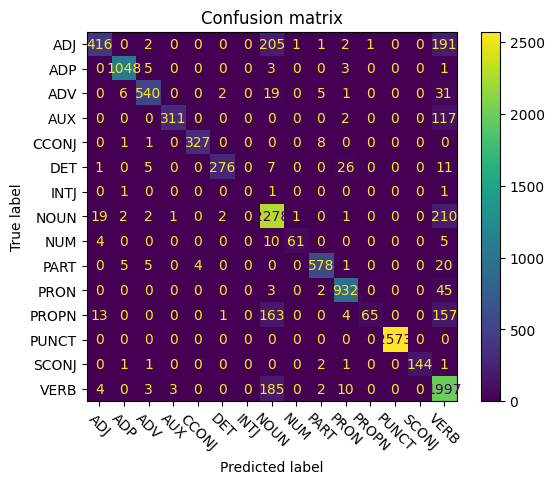

In [107]:
tagger = HMM_PoS_Tagger()
tagger.train(trainCorpus, unk_value=3, suffix=True)
tagger.evaluate(devCorpus)

There is an increment of both accuracy and F1-score using this solution, which is a first step to confirm that suffixes can provide a lot of information of the syntactic role of words.

We can do another hyperparameter sweep to see if there is any improvement with higher appearances of infrequent word contrary to the model that does not use the suffix matrix:

In [108]:
unk_sweep(trainCorpus, [], devCorpus, [3,5,10,15,20,25], True)

Training...
#### UNK-VALUE: 3 ####
SCORE: 11546 / 13100
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.881374 |
+----------+----------+
| Precison | 0.896408 |
+----------+----------+
| Recall   | 0.881374 |
+----------+----------+
| F1 Score | 0.872592 |
+----------+----------+


Training...
#### UNK-VALUE: 5 ####
SCORE: 11371 / 13100
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.868015 |
+----------+----------+
| Precison | 0.886566 |
+----------+----------+
| Recall   | 0.868015 |
+----------+----------+
| F1 Score | 0.857858 |
+----------+----------+


Training...
#### UNK-VALUE: 10 ####
SCORE: 11124 / 13100
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.84916  |
+----------+----------+
| Precison | 0.871652 |
+----------+----------+
| Recall   | 0.84916  |
+----------+----------+
| F1 Score | 0.836969 |
+----------+----------+


Tra

Once again, increasing the number of appearances does not produce better results.

### Evaluating with test corpus
Taking those conclusions into account let's evaluate our model with the test corpus


Training...
Evaluating...

SCORE: 11511 / 13107
The results of the evaluations are:

Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.878233 |
+----------+----------+
| Precison | 0.894189 |
+----------+----------+
| Recall   | 0.878233 |
+----------+----------+
| F1 Score | 0.868767 |
+----------+----------+

Counts' differences:

+-------+---------------+---------------------+--------------+
| Tag   |   Gold counts |   Prediction counts |   Difference |
+=======+===============+=====================+==============+
| AUX   |           429 |                 300 |          129 |
+-------+---------------+---------------------+--------------+
| ADJ   |           830 |                 491 |          339 |
+-------+---------------+---------------------+--------------+
| VERB  |          2185 |                2775 |          590 |
+-------+---------------+---------------------+--------------+
| SCONJ |           141 |                 138 |    

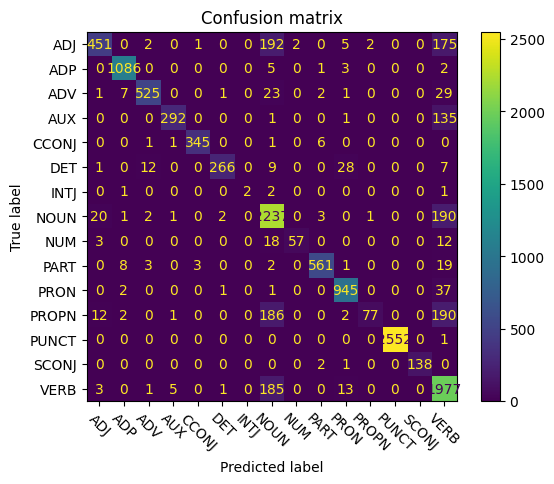

In [109]:
tagger = HMM_PoS_Tagger()
tagger.train(trainCorpus, unk_value=3, suffix=True)
tagger.evaluate(testCorpus)

As a result we obtain 0.8782% of accuracy and a F1-score of 0.8687% which are very positive results. Let's try to analyze which are the tags that suffer more in the evaluation:

In [110]:
tagger.evaluate_per_tag(testCorpus)

              precision    recall  f1-score   support

         ADJ     0.9185    0.5434    0.6828       830
         ADP     0.9810    0.9900    0.9855      1097
         ADV     0.9615    0.8913    0.9251       589
         AUX     0.9733    0.6807    0.8011       429
       CCONJ     0.9885    0.9746    0.9815       354
         DET     0.9815    0.8235    0.8956       323
        INTJ     1.0000    0.3333    0.5000         6
        NOUN     0.7816    0.9105    0.8411      2457
         NUM     0.9661    0.6333    0.7651        90
        PART     0.9757    0.9397    0.9573       597
        PRON     0.9450    0.9584    0.9517       986
       PROPN     0.9625    0.1638    0.2800       470
       PUNCT     1.0000    0.9996    0.9998      2553
       SCONJ     1.0000    0.9787    0.9892       141
        VERB     0.7124    0.9048    0.7972      2185

    accuracy                         0.8782     13107
   macro avg     0.9432    0.7817    0.8235     13107
weighted avg     0.8942   



As we can see there are some tags that present worse results than the others. The 'X' and "SYM" tags are not predicted at all becouse, as we mentioned before, none of the corpuses have examples of those classifications.

Propper names also show quite poor results. It's possible that the repetition of proper names in our Corpus is low which leads to the replacement of them as 'UNK' tokens. Knowing the source of the corpus, it's natural to think that in an article the repetition of a proper name more than 3 times is unusual. Moreover, is quite atypical to think that the articles in the same corpus cite or mention the same proper names as the articles in the train corpus.

Interjection is an another tag with low scores. This poor results could be linked to the fact that the amount of interjections in the train corpus is really low and some of these words could be replaced with the "UNK" token too. The same thing happens with the 'NUM' tag.

As it was expected, the 'PUNCT' tag has the best results. This phenomenon happens because the punctuation symbols used are usually finite and normally don't have other syntactic roles.


### The results of our model with polysemics words

Polisemic words are those that can be classified with more then one POS tag. The correct tag depends on the context of those words during the manual classification of the words. This model classifies the words with the tag that has the maximum probability of being the correct one instead of the context so, in some cases, the polysemic words are not classified with the correct tag.

Using as examples the following sentences we are able to see the classification errors mentioned before. Also, we will see cases that are correct in case that the word has different meaning but it is still classified with the same POS tag as it is.



The word *granat* is the first polysemic word we will analize.

In the sentence:

* ***Granat*** to czerwony owoc. (***Pomegranate*** is a red fruit)

the word *granat* means pomegranate.

In the sentence:

* Żołnierz rzuca ***granat*** w kierunku budynku. (A soldier throws a ***grenade*** toward the building.)

the word *granat* means grenade.

In both cases the word granat is a NOUN.

In [111]:
import re
sentence = "Granat to czerwony owoc."
words = re.findall(r'\b\w+\b|[.,!?;:(){}¿¡|]', sentence)
sentence = " ".join(words)

print("\nThe predicted sequence of tags is:")
print(str(tagger.predict(sentence)))


The predicted sequence of tags is:
[('Granat', 'NOUN'), ('to', 'VERB'), ('czerwony', 'NOUN'), ('owoc', 'VERB'), ('.', 'PUNCT')]


In [112]:
sentence = "Żołnierz rzuca granat w kierunku budynku."
words = re.findall(r'\b\w+\b|[.,!?;:(){}¿¡|]', sentence)
sentence = " ".join(words)

print("\nThe predicted sequence of tags is:")
print(str(tagger.predict(sentence)))


The predicted sequence of tags is:
[('Żołnierz', 'VERB'), ('rzuca', 'VERB'), ('granat', 'NOUN'), ('w', 'ADP'), ('kierunku', 'NOUN'), ('budynku', 'NOUN'), ('.', 'PUNCT')]


As it can be seen in both cases it is correctly classified as a NOUN. The next polisemic word is "to". It can be classified as a VERB, but it can be also be classified as PRON.

In the sentence:

* Ta pani **to** moja żona. (This lady ***is*** my wife.)

the word *to* corresponds to the word *is* in English even thought it is not the direct translation of the verb to be and should be classified as VERB.

In the sentence:

* Niech mi **to** powie. (Let him tell me ***this***.)

*to* corresponds to the word *this* and should be tagged PRON.

In [113]:
sentence = "Ta pani to moja żona."
words = re.findall(r'\b\w+\b|[.,!?;:(){}¿¡|]', sentence)
sentence = " ".join(words)

print("\nThe predicted sequence of tags is:")
print(str(tagger.predict(sentence)))


The predicted sequence of tags is:
[('Ta', 'VERB'), ('pani', 'NOUN'), ('to', 'VERB'), ('moja', 'DET'), ('żona', 'NOUN'), ('.', 'PUNCT')]


In [114]:
sentence = "Niech mi to powie."
words = re.findall(r'\b\w+\b|[.,!?;:(){}¿¡|]', sentence)
sentence = " ".join(words)

print("\nThe predicted sequence of tags is:")
print(str(tagger.predict(sentence)))


The predicted sequence of tags is:
[('Niech', 'VERB'), ('mi', 'PRON'), ('to', 'VERB'), ('powie', 'VERB'), ('.', 'PUNCT')]


As it can be seen, the word *to* is classified in both cases as VERB althought it should be classified as PRON. This happens becouse the probability of *to* beign a VERB is higher than the probability of the tag PRON.

### Worst predicted sentences

We know which are the worst and best predicted tags but let's analyze the sentences that contain a higher percentage of errors in our test Corpus so that we can obtain more conclusions. In order to do that, we will use an especific method of the tagger that returns the top 10 worst predicted sentences in the test corpus:

In [115]:
tagger.top10worstPredictions(testCorpus)

+---------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+--------------+
| Real sentence and tags                                                                                              | Incorrect tags                                                                      |   Error rate |
+=====================================================================================================================+=====================================================================================+==============+
| [('kłopotom', 'NOUN'), ('zaradziła', 'VERB'), ('gawlikowa', 'PROPN'), ('.', 'PUNCT')]                               | [('kłopotom', 'VERB'), ('zaradziła', 'NOUN'), ('gawlikowa', 'ADJ')]                 |     0.75     |
+-------------------------------------------------------------------------------------------------------------------

The conclusions we can substract analyzing this sentences are:

* The highest error rate in our model's classification of the current test Corpus is 75%.

* In all of the sentences, the first words are classified in a wrong way. Specifically, they are consistently classified as verbs. This misclassification may indicate a higher probability assigned by the model to the first word in a sentence being a verb.

* The most common error in these cases is the confusion between verbs and nouns. Four nouns were classified as verbs, and eight verbs were classified as nouns. While there were 1 or 2 errors for other POS tags, they were not as frequent as the errors involving verbs and nouns, so this could mean that the model sometimes confuses nouns and verbs. This could be verified with the data from the confusion matrix were we can observe the noun-verb missclassification is one of the most common one.

### Testing our model with data outside the training domain
As we know this Corpus is extracted from academic texts and newspapers so an intuitive thought might be that with sentences outside this domain, especially informal sentences, the performance of the model might go down. To support this hypothesis, let's try to write some everyday phrases in Polish and see the results given by the model:

In [116]:
sentence = "Bądź tu mądry i pisz wiersze."
words = re.findall(r'\b\w+\b|[.,!?;:(){}¿¡|]', sentence)
sentence = " ".join(words)

print("\nThe predicted sequence of tags is:")
print(str(tagger.predict(sentence)))


The predicted sequence of tags is:
[('Bądź', 'VERB'), ('tu', 'ADV'), ('mądry', 'VERB'), ('i', 'CCONJ'), ('pisz', 'NOUN'), ('wiersze', 'NOUN'), ('.', 'PUNCT')]


Correct classification

[('Bądź', 'AUX'), ('tu', 'ADV'), ('mądry', 'ADJ'), ('i', 'CCONJ'), ('pisz', 'VERB'), ('wiersze', 'NOUN'), ('.', 'PUNCT')]

Being a proverb meaning *Be wise and write poetry*.

In [117]:
sentence = "Wolisz kawę czy herbate?"
words = re.findall(r'\b\w+\b|[.,!?;:(){}¿¡|]', sentence)
sentence = " ".join(words)

print("\nThe predicted sequence of tags is:")
print(str(tagger.predict(sentence)))


The predicted sequence of tags is:
[('Wolisz', 'VERB'), ('kawę', 'NOUN'), ('czy', 'PART'), ('herbate', 'VERB'), ('?', 'PUNCT')]


Correct classification

[('Wolisz', 'VERB'), ('kawę', 'NOUN'), ('czy', 'CCONJ'), ('herbate', 'NOUN'), ('?', 'PUNCT')]

Meaning *Do you prefer coffee or tea?*.

In [118]:
sentence = "Kończę szkołę o piątej i potem idę na obiad."
words = re.findall(r'\b\w+\b|[.,!?;:(){}¿¡|]', sentence)
sentence = " ".join(words)

print("\nThe predicted sequence of tags is:")
print(str(tagger.predict(sentence)))


The predicted sequence of tags is:
[('Kończę', 'VERB'), ('szkołę', 'NOUN'), ('o', 'ADP'), ('piątej', 'NOUN'), ('i', 'CCONJ'), ('potem', 'ADV'), ('idę', 'VERB'), ('na', 'ADP'), ('obiad', 'NOUN'), ('.', 'PUNCT')]


Correct classification

[('Kończę', 'VERB'),
 ('szkołę', 'NOUN'),
 ('o', 'ADP'),
 ('piątej', 'NUM'),
 ('i', 'CCONJ'),
 ('potem', 'ADV'),
 ('idę', 'VERB'),
 ('na', 'ADP'),
 ('obiad', 'NOUN'),
 ('.', 'PUNCT')]

Meaning *I finish school at 5 PM and then go to eat.*


In [119]:
sentence = "Jestem bardzo zmęczony po całym dniu pracy."
words = re.findall(r'\b\w+\b|[.,!?;:(){}¿¡|]', sentence)
sentence = " ".join(words)

print("\nThe predicted sequence of tags is:")
print(str(tagger.predict(sentence)))


The predicted sequence of tags is:
[('Jestem', 'VERB'), ('bardzo', 'ADV'), ('zmęczony', 'VERB'), ('po', 'ADP'), ('całym', 'ADJ'), ('dniu', 'NOUN'), ('pracy', 'NOUN'), ('.', 'PUNCT')]


Correct classification

[('Jestem', 'AUX'), ('bardzo', 'ADV'), ('zmęczony', 'ADJ'), ('po', 'ADP'), ('całym', 'ADJ'), ('dniu', 'NOUN'), ('pracy', 'NOUN'), ('.', 'PUNCT')]

Meaning *I am very tired after a day's work*.

In [120]:
sentence = "Czy możesz mi pomóc znaleźć drogę do dworca kolejowego?"
words = re.findall(r'\b\w+\b|[.,!?;:(){}¿¡|]', sentence)
sentence = " ".join(words)

print("\nThe predicted sequence of tags is:")
print(str(tagger.predict(sentence)))


The predicted sequence of tags is:
[('Czy', 'VERB'), ('możesz', 'VERB'), ('mi', 'PRON'), ('pomóc', 'VERB'), ('znaleźć', 'VERB'), ('drogę', 'NOUN'), ('do', 'ADP'), ('dworca', 'NOUN'), ('kolejowego', 'ADJ'), ('?', 'PUNCT')]


Correct classification

[('Czy', 'PART'), ('możesz', 'VERB'), ('mi', 'PRON'), ('pomóc', 'VERB'), ('znaleźć', 'VERB'), ('drogę', 'NOUN'), ('do', 'ADP'), ('dworca', 'NOUN'), ('kolejowego', 'ADJ'), ('?', 'PUNCT')]

Meaning *Can you help me find the train station?*.

In the majority of these sentences, there is one or two tokens incorrectly tagged. *Be wise and write poetry* is a popular Polish proverb and the structure of the sentence is not really typical. In the first half of the sentence, when the phrase has a strange beggining, the model made two mistakes, but in the second half, all words have the correct tag.

The missclasification of AUX as VERB is common in those examples and interestingly this phenomenon was already seen in the top 10 worst tagged sentences. There is also confussion with the word *czy*. It can be tagged as CCONJ, as seen in the second example in this list, where it functions as the equivalent of the "or" conjunction, or as PART as seen in the last example for forming a question. Overall, the results of the classifications are not that incorrect.

To test the generalisation of our model we can test it with another Polish corpus called [PDB](https://github.com/UniversalDependencies/UD_Polish-PDB/blob/master/README.md) offered in the Universal Dependencies website. This way, we can tell how good is the model trained with these specific corpuses at generalisation, considering neither corpus is overly specific in one field.

Evaluating...

SCORE: 28059 / 33581
The results of the evaluations are:

Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.835562 |
+----------+----------+
| Precison | 0.866514 |
+----------+----------+
| Recall   | 0.835562 |
+----------+----------+
| F1 Score | 0.825729 |
+----------+----------+

Counts' differences:

+-------+---------------+---------------------+--------------+
| Tag   |   Gold counts |   Prediction counts |   Difference |
+=======+===============+=====================+==============+
| AUX   |           838 |                 511 |          327 |
+-------+---------------+---------------------+--------------+
| ADJ   |          3358 |                2028 |         1330 |
+-------+---------------+---------------------+--------------+
| VERB  |          3886 |                6080 |         2194 |
+-------+---------------+---------------------+--------------+
| SCONJ |           686 |                 494 |          192 |


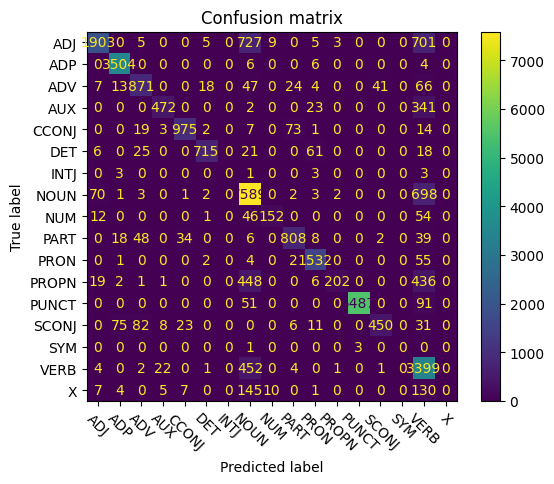

In [121]:
testCorpus_PDB = conllu_preprocess("/content/drive/My Drive/datasets_syntax/pl_pdb-ud-test.conllu")
tagger.evaluate(testCorpus_PDB)

In this case, the results have not changed much. This is a sign of the corpus used to train the model being very general and not overly focused on one single topic. THe PDB corpus also has this same characteristic, so to further confirm this, we can train another model over this dataset and test it again using both test corpuses.

In [122]:
trainCorpus_PDB = conllu_preprocess("/content/drive/My Drive/datasets_syntax/pl_pdb-ud-train.conllu")
tagger = HMM_PoS_Tagger()
tagger.train(trainCorpus, unk_value=3, suffix=True)
print("Results for PDB test corpus")
tagger.evaluate_summary(testCorpus_PDB)
print("Results for LFG test corpus")
tagger.evaluate_summary(testCorpus)

Training...
Results for PDB test corpus
SCORE: 28059 / 33581
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.835562 |
+----------+----------+
| Precison | 0.866514 |
+----------+----------+
| Recall   | 0.835562 |
+----------+----------+
| F1 Score | 0.825729 |
+----------+----------+
Results for LFG test corpus
SCORE: 11511 / 13107
Metrics:

+----------+----------+
| Metric   |    Score |
+==========+==========+
| Accuracy | 0.878233 |
+----------+----------+
| Precison | 0.894189 |
+----------+----------+
| Recall   | 0.878233 |
+----------+----------+
| F1 Score | 0.868767 |
+----------+----------+


As we can see, the results are very uniform. Considering this type of models are very dependent on the corpus used, we can safely assume that this generalisation success is mostly entirely due to the corpus used in training.

We hypothesised that increasing the threshold for 'UNK' tokens would also improve the generalisation. With this in mind, we repeated the hyperparameter sweep explained above for both models trained and tested in both corpuses.

In [135]:
testCorpus_PDB = conllu_preprocess("/content/drive/My Drive/datasets_syntax/pl_pdb-ud-test.conllu")
trainCorpus_PDB = conllu_preprocess("/content/drive/My Drive/datasets_syntax/pl_pdb-ud-train.conllu")
trainCorpus_LFG = conllu_preprocess('/content/drive/My Drive/datasets_syntax/pl_lfg-ud-train.conllu')
testCorpus_LFG= conllu_preprocess('/content/drive/My Drive/datasets_syntax/pl_lfg-ud-test.conllu')

unk_array = [2,3,5,10,20]
experimento = 1

train_corpus_array = [(trainCorpus_LFG, "LFG"), (trainCorpus_PDB, "PDB")]
test_corpus_array = [(testCorpus_LFG, "LFG"), (testCorpus_PDB, "PDB")]
resultados=[]

for trainCorpus in train_corpus_array:
    for unk in unk_array:
        accuracy = 0
        for testCorpus in test_corpus_array:
            # Generate and train the model
            tagger = HMM_PoS_Tagger()
            tagger.train(trainCorpus[0], unk_value=unk, suffix=True)

            # Evaluate the model
            gold, pred = tagger.eval(testCorpus[0])
            acc = tagger.accuracy(gold, pred)
            print(acc)
            accuracy += acc
            print("\n")

        print("#### Mean of the experiment:", experimento, "####")
        print('\n')
        print('Train corpus:', trainCorpus[1])
        print('Test corpus:', testCorpus[1])
        accuracy = accuracy/2
        print(accuracy)
        resultados.append(accuracy)
        experimento+=1
        print('############################################################# \n \n')


print(resultados)

Training...
SCORE: 11674 / 13107
0.8906691081101702


Training...
SCORE: 28533 / 33581
0.8496769006283315


#### Mean of the experiment: 1 ####


Train corpus: LFG
Test corpus: PDB
0.8701730043692508
############################################################# 
 

Training...
SCORE: 11511 / 13107
0.8782330052643625


Training...
SCORE: 28059 / 33581
0.8355617760042882


#### Mean of the experiment: 2 ####


Train corpus: LFG
Test corpus: PDB
0.8568973906343254
############################################################# 
 

Training...
SCORE: 11300 / 13107
0.8621347371633479


Training...
SCORE: 27520 / 33581
0.819511033024627


#### Mean of the experiment: 3 ####


Train corpus: LFG
Test corpus: PDB
0.8408228850939874
############################################################# 
 

Training...
SCORE: 11041 / 13107
0.842374303807126


Training...
SCORE: 26645 / 33581
0.7934546320836187


#### Mean of the experiment: 4 ####


Train corpus: LFG
Test corpus: PDB
0.8179144679453723
####

As we can see by the results all the experiments using the PBD train corpus are usually better at generalizing and present better results when the mean is applied. We can also see that the results do not improve when we increase the threshold for infrequent words appearances.

### Comparison with ntlk HMM model
Finally, we are going to compare our results with the HMM model in the nltk library. Our best accuracy with the LFG Corpus was 0.915 and the best result with the PBD Corpus was 0.919.

In [124]:
import nltk
model = nltk.tag.hmm.HiddenMarkovModelTagger.train(trainCorpus_LFG)
model.accuracy(testCorpus_LFG)

0.8683146410315099

In [125]:
model = nltk.tag.hmm.HiddenMarkovModelTagger.train(trainCorpus_PDB)
model.accuracy(testCorpus_PDB)

0.8842202435901254

As we can see the results returned by both models are practically the same. Now we are going to try training the models with one corpus and testing them with opposite test corpus to see if they can generalize better than our models:

In [136]:
model = nltk.tag.hmm.HiddenMarkovModelTagger.train(trainCorpus_LFG)
model.accuracy(testCorpus_PDB)

0.7940502069622704

In [127]:
model = nltk.tag.hmm.HiddenMarkovModelTagger.train(trainCorpus_PDB)
model.accuracy(testCorpus_LFG)

0.8863965819790951

In general, the results are very similar to all of our experiments, which leads to the idea that the corpus used is good for generalisation, PDB being a little more efficient in this regard. Contrary to the tests done over the Portuguese corpus, the use of the suffix matrix doesn't make a huge difference in this case.

## Conclusions

In our experimentation with an HMM model for Part-of-Speech tagging on a Polish corpus, several key conclusions have emerged. First and foremost, we've observed that HMM models are highly dependent on the corpus they are trained on. This dependency underscores the importance of selecting the right dataset for each specific task. In this case, we have found that both corpuses performed similarly and were good when generalising, contrary to the Portuguese corpus.

Interestingly, as we experimented with increasing the 'threshold' for less frequent words, we found that this adjustment did not lead to significant improvements in performance in any of our trials. This suggests that the HMM model's performance is not substantially affected by modifying the threshold for rare words.

One of the most noteworthy findings from our experimentation is the slight improvement in performance through the use of suffix matrices. This discovery aligns with our initial hypothesis that words sharing the same syntactic role often share common suffixes. The incorporation of suffix information has shown to be a valuable addition to our HMM model, enhancing its accuracy and confirming the relationship between syntactic roles and suffix patterns.

Finally, we can conclude that our model performs very similarly when compared to the nltk one, even with the addition of the suffix matrix. The nltk model also has the versatility and generalisation properties of our model.